### Valores Binários

Encontrar a melhor combinação de itens, tal que o peso máximo é 15kg

In [1]:
mochila = data.frame(item = c("Canivete", "Feijão", "Batatas", "Lanterna", "Saco de dormir", "Corda", "Bússola"), pontos = c(10,20,15,2,30,10,30), peso = c(1,5,10,1,7,5,1))
mochila

item,pontos,peso
<fct>,<dbl>,<dbl>
Canivete,10,1
Feijão,20,5
Batatas,15,10
Lanterna,2,1
Saco de dormir,30,7
Corda,10,5
Bússola,30,1


In [2]:
f = function(x)
{
    pontos = 0
    peso = 0
    
    for (i in 1:7)
    {
        #1001101
        if (x[i] != 0)
        {
            pontos = pontos + mochila[i,2]
            peso = peso + mochila[i,3]     
        }
    }
    
    if (peso > 15)
        pontos = 0
    
    return (pontos)
}

In [3]:
f

function(x)
{
    pontos = 0
    peso = 0
    
    for (i in 1:7)
    {
        #1001101
        if (x[i] != 0)
        {
            pontos = pontos + mochila[i,2]
            peso = peso + mochila[i,3]     
        }
    }
    
    if (peso > 15)
        pontos = 0
    
    return (pontos)
}

In [4]:
f(c(1,0,0,1,1,0,1))
f(c(1,0,1,1,1,0,1))
f(c(0,0,0,1,1,0,1))
f(c(1,1,1,1,1,1,1))
f(c(0,1,0,1,0,1,0))

[1] 72

[1] 0

[1] 62

[1] 0

[1] 32

Como resolver isso?
Algoritmo Genético!

In [5]:
# install.packages("GA")
library(GA)

Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2
Type 'citation("GA")' for citing this R package in publications.


Attaching package: 'GA'


The following object is masked from 'package:utils':

    de




In [6]:
resultado = ga("binary", # Valores Binários ex.: c(1,0,0,1,1,0,1)
               fitness = f, # Função de Ajuste
               nBits = 7, # Número de bits
               popSize = 10, # Número total de cromossomos
               maxiter = 30, # Máximo de gerações
               monitor = T, # Acompanhar a evolução
               names = c("Canivete", "Feijão", "Batatas", "Lanterna", "Saco de dormir", "Corda", "Bússola") # Nome dos itens
               )

GA | iter = 1 | Mean = 27.8 | Best = 70.0
GA | iter = 2 | Mean = 36.8 | Best = 70.0
GA | iter = 3 | Mean = 48 | Best = 70
GA | iter = 4 | Mean = 44.2 | Best = 70.0
GA | iter = 5 | Mean = 49.2 | Best = 70.0
GA | iter = 6 | Mean = 47.8 | Best = 70.0
GA | iter = 7 | Mean = 48.4 | Best = 70.0
GA | iter = 8 | Mean = 54.6 | Best = 70.0
GA | iter = 9 | Mean = 51.4 | Best = 70.0
GA | iter = 10 | Mean = 60.8 | Best = 92.0
GA | iter = 11 | Mean = 50.8 | Best = 92.0
GA | iter = 12 | Mean = 55.8 | Best = 92.0
GA | iter = 13 | Mean = 73.2 | Best = 92.0
GA | iter = 14 | Mean = 71.2 | Best = 92.0
GA | iter = 15 | Mean = 72 | Best = 92
GA | iter = 16 | Mean = 65 | Best = 92
GA | iter = 17 | Mean = 69 | Best = 92
GA | iter = 18 | Mean = 54.8 | Best = 92.0
GA | iter = 19 | Mean = 51 | Best = 92
GA | iter = 20 | Mean = 24.6 | Best = 92.0
GA | iter = 21 | Mean = 34.6 | Best = 92.0
GA | iter = 22 | Mean = 27.4 | Best = 92.0
GA | iter = 23 | Mean = 36.6 | Best = 92.0
GA | iter = 24 | Mean = 27.6 | Best = 92

In [7]:
resultado

An object of class "ga"

Call:
ga(type = "binary", fitness = f, nBits = 7, popSize = 10, maxiter = 30,     names = c("Canivete", "Feijão", "Batatas", "Lanterna", "Saco de dormir",         "Corda", "Bússola"), monitor = T)

Available slots:
 [1] "call"         "type"         "lower"        "upper"        "nBits"       
 [6] "names"        "popSize"      "iter"         "run"          "maxiter"     
[11] "suggestions"  "population"   "elitism"      "pcrossover"   "pmutation"   
[16] "optim"        "fitness"      "summary"      "bestSol"      "fitnessValue"
[21] "solution"    

In [8]:
summary(resultado)

-- Genetic Algorithm ------------------- 

GA settings: 
Type                  =  binary 
Population size       =  10 
Number of generations =  30 
Elitism               =  1 
Crossover probability =  0.8 
Mutation probability  =  0.1 

GA results: 
Iterations             = 30 
Fitness function value = 92 
Solution = 
     Canivete Feijão Batatas Lanterna Saco de dormir Corda Bússola
[1,]        1      1       0        1              1     0       1

In [9]:
a = summary(resultado)$solution
a

Canivete,Feijão,Batatas,Lanterna,Saco de dormir,Corda,Bússola
1,1,0,1,1,0,1


In [10]:
f(a)

[1] 92

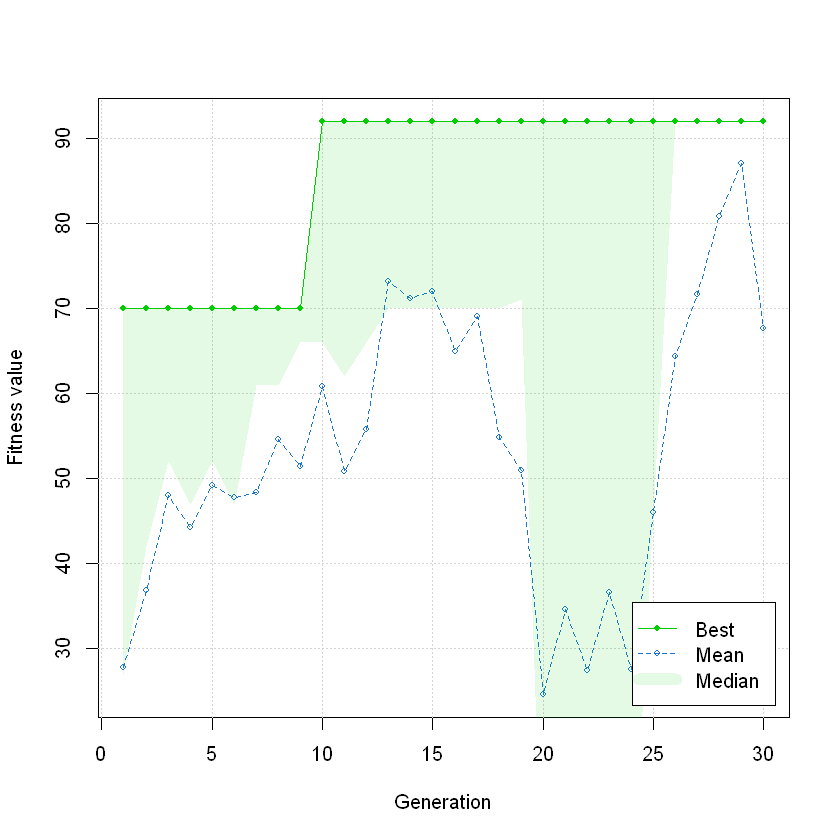

In [11]:
plot(resultado)